In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
!mkdir -p ~/.kaggle
!cp /kaggle/input/kagglejson/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


cp: cannot stat '/kaggle/input/kagglejson/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset -p /kaggle/working


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100%|██████████████████████████████████████| 2.70G/2.70G [01:38<00:00, 33.4MB/s]
100%|██████████████████████████████████████| 2.70G/2.70G [01:38<00:00, 29.3MB/s]


In [5]:
%%capture
!unzip /kaggle/working/new-plant-diseases-dataset.zip -d /kaggle/working


In [6]:

def check_image_dimensions(folder_path):
    """
    Checks if all images in a folder and its subfolders have the same dimensions.

    :param folder_path: Path to the main folder
    :return: True if all images have the same dimensions, otherwise False and the inconsistent dimensions
    """
    dimensions = None
    inconsistent_files = []
    total_files = sum(len(files) for _, _, files in os.walk(folder_path))  # Count all files

    # Traverse the folder and its subfolders
    with tqdm(total=total_files, desc="Processing images", unit="file") as pbar:
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                try:
                    # Open the image file
                    with Image.open(file_path) as img:
                        img_dimensions = img.size  # Returns (width, height)
                        if dimensions is None:
                            # Set the reference dimensions
                            dimensions = img_dimensions
                        elif img_dimensions != dimensions:
                            # Add to the list of inconsistent files if dimensions don't match
                            idnconsistent_files.append((file_path, img_dimensions))
                except Exception as e:
                    # Handle errors when processing non-image files or corrupted images
                    print(f"Error processing {file_path}: {e}")
                finally:
                    pbar.update(1)  # Update the progress bar

    if inconsistent_files:
        # Print all files with inconsistent dimensions
        print("The following images have inconsistent dimensions:")
        for file_path, dim in inconsistent_files:
            print(f"{file_path} - Dimensions: {dim}")
        return False
    else:
        # Print success message if all dimensions are consistent
        print("All images have the same dimensions:", dimensions)
        return True

# Specify the main folder to check
folder_path = "/kaggle/working/"
check_image_dimensions(folder_path)


Processing images:   1%|          | 1040/175769 [00:00<00:30, 5697.67file/s]

Error processing /kaggle/working/__notebook__.ipynb: cannot identify image file '/kaggle/working/__notebook__.ipynb'
Error processing /kaggle/working/new-plant-diseases-dataset.zip: cannot identify image file '/kaggle/working/new-plant-diseases-dataset.zip'


Processing images: 100%|██████████| 175769/175769 [00:22<00:00, 7935.81file/s]

All images have the same dimensions: (256, 256)


True

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Before: [[[0.7254902  0.67058825 0.7294118 ]
  [0.37254903 0.31764707 0.37647063]
  [0.49803925 0.4431373  0.5019608 ]
  ...
  [0.59607846 0.5294118  0.5686275 ]
  [0.7294118  0.6627451  0.7019608 ]
  [0.6431373  0.5764706  0.6156863 ]]

 [[0.4901961  0.43529415 0.49411768]
  [0.6392157  0.58431375 0.6431373 ]
  [0.4901961  0.43529415 0.49411768]
  ...
  [0.5921569  0.5254902  0.5647059 ]
  [0.7058824  0.6392157  0.6784314 ]
  [0.72156864 0.654902   0.69411767]]

 [[0.28627452 0.23137257 0.2901961 ]
  [0.43137258 0.37647063 0.43529415]
  [0.5176471  0.46274513 0.52156866]
  ...
  [0.7254902  0.65882355 0.69803923]
  [0.6745098  0.60784316 0.64705884]
  [0.69803923 0.6313726  0.67058825]]

 ...

 [[0.59607846 0.5137255  0.53333336]
  [0.6        0.5176471  0.5372549 ]
  [0.43137258 0.34901962 0.36862746]
  ...
  [0.6313726  0.54509807 0.5568628 ]
  [0.5803922  0.49411768 0.5058824 ]
  [0.6666667  0.5

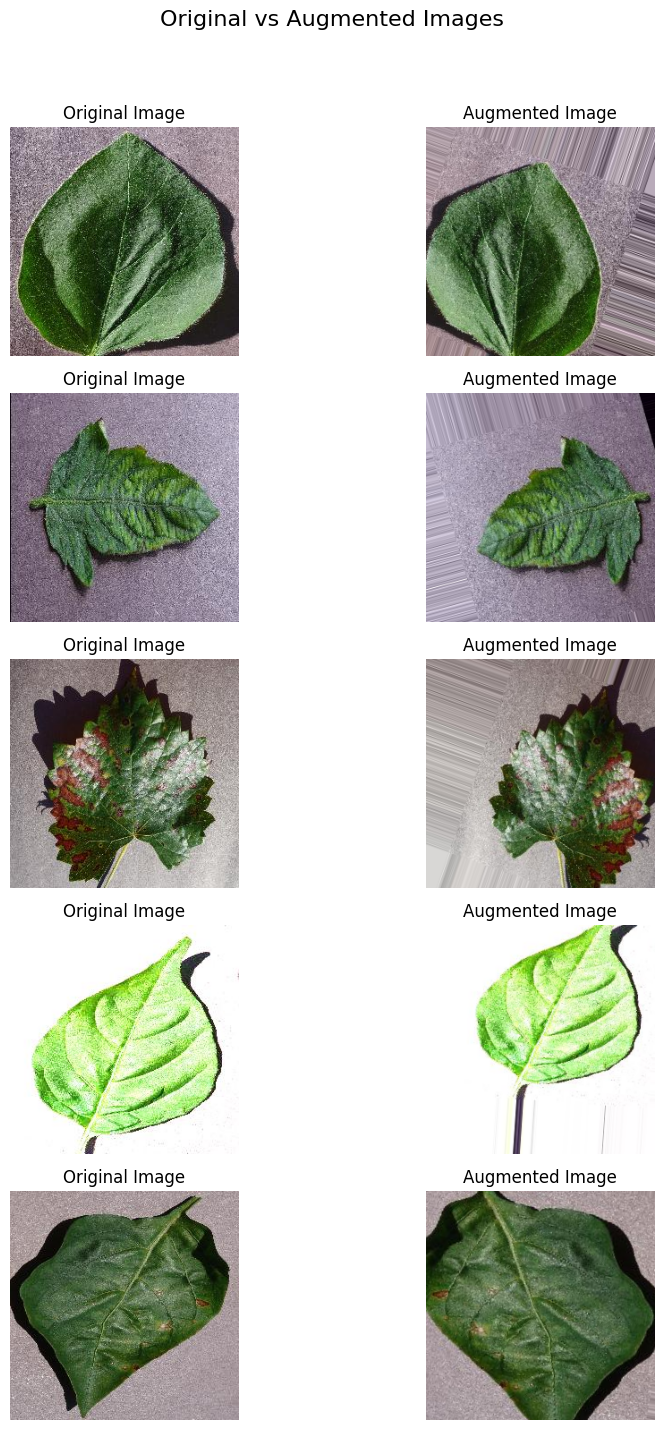

Dictionary containing classes:
{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tom

In [7]:

# Configuration of the image data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalization: scales pixel values between 0 and 1
    rotation_range=20,  # Random rotation up to 20 degrees
    width_shift_range=0.2,  # Random horizontal shift up to 20% of the width
    height_shift_range=0.2,  # Random vertical shift up to 20% of the height
    zoom_range=0.2,  # Random zoom up to 20%
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Filling missing pixels with the nearest value
)

# Generator for the validation or test set (without augmentation)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Only normalization

# Load images from the file system
train_generator = train_datagen.flow_from_directory(
    "/kaggle/working/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",  # Path to the training dataset
    target_size=(256, 256),  # Resize images to 224x224
    batch_size=32,  # Number of images per batch
    class_mode='categorical' , # Type of labels: 'categorical' for multi-class classification
    shuffle=True
)

valid_generator = validation_datagen.flow_from_directory(
    "/kaggle/working/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Visualization of 5 images before and after processing
def plot_images_before_after(generator, num_images=5):
    # Get a batch of images from the generator
    images, _ = next(generator)

    # Number of images to display
    num_images = min(num_images, len(images))

    fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 3))
    fig.suptitle('Original vs Augmented Images', fontsize=16)

    for i in range(num_images):
        # Show the original image
        axes[i, 0].imshow(images[i])
        axes[i, 0].set_title("Original Image")
        axes[i, 0].axis('off')
        print("Before:",images[i])

        # Create a new augmented image (simulate data augmentation)
        augmented_img = train_datagen.random_transform(images[i])
        axes[i, 1].imshow(augmented_img)
        axes[i, 1].set_title("Augmented Image")
        axes[i, 1].axis('off')
        print("After:",augmented_img)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Get a batch from the validation generator to visualize the original images
valid_generator.reset()  # Ensure the generator starts from the beginning
images, labels = next(valid_generator)

# Denormalize images for correct visualization
#images = images * 255.0

# Display 5 images before and after processing
plot_images_before_after(valid_generator, num_images=5)

print("Dictionary containing classes:")
print(train_generator.class_indices)

print("List of classes with index linked to dataset")
print(train_generator.classes)

In [8]:
# Import necessary libraries
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,  BatchNormalization, GlobalAveragePooling2D



import matplotlib.pyplot as plt


In [9]:
def base_cnn_model(input_shape=(256, 256, 3), num_classes=38):

    """

    Custom CNN model for plant disease detection.

    :param input_shape: Tuple representing the shape of input images.

    :param num_classes: Integer, number of output classes.

    :return: Compiled Keras model.

    """

    model = Sequential()



    # Convolutional Block 1

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

    model.add(MaxPooling2D(pool_size=(2, 2)))



    # Convolutional Block 2

    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))



    # Convolutional Block 3

    model.add(Conv2D(128, (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))



    # Fully Connected Layers

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))

    model.add(Dropout(0.5))  # Dropout for regularization

    model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification





    return model


In [10]:
# Create the CNN model

model = base_cnn_model(input_shape=(256, 256, 3), num_classes=38)



# Display the model architecture

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,594,470 (112.89 MB)

 Trainable params: 29,594,470 (112.89 MB)

 Non-trainable params: 0 (0.00 B)

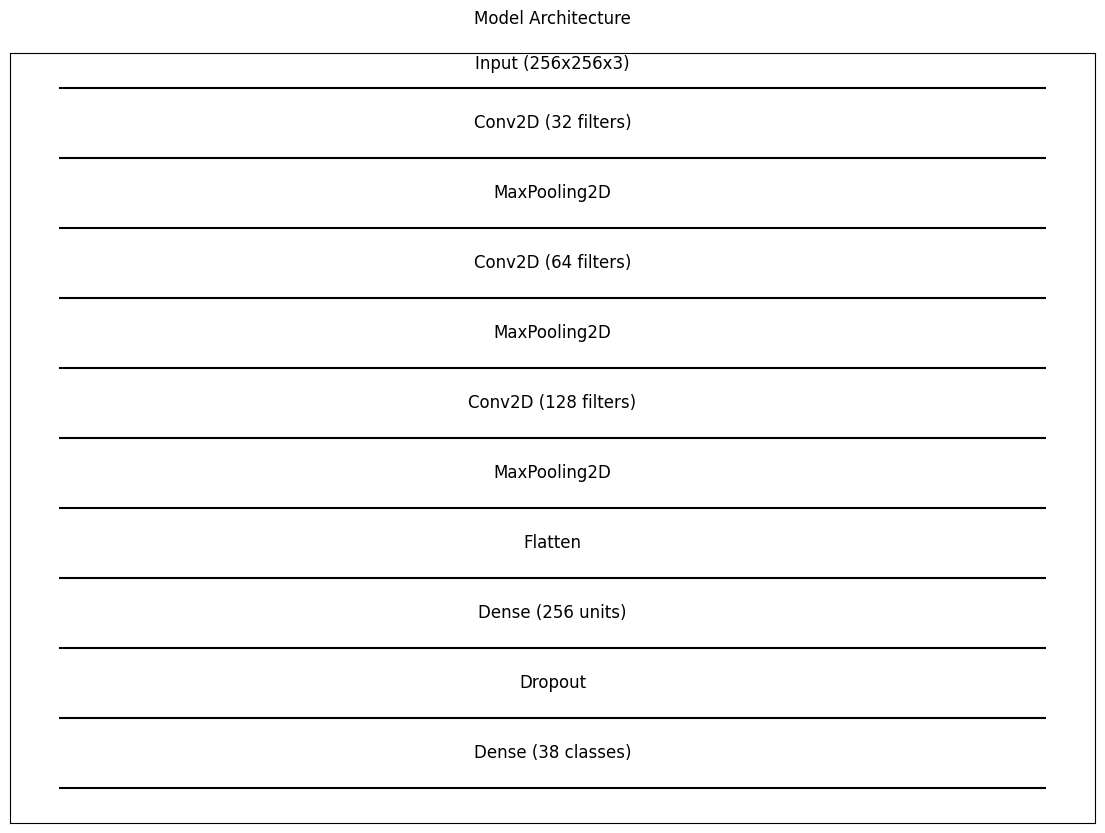

In [11]:
def visualize_model_architecture():

    layers = [

        "\nInput (256x256x3)",

        "Conv2D (32 filters)",

        "MaxPooling2D",

        "Conv2D (64 filters)",

        "MaxPooling2D",

        "Conv2D (128 filters)",

        "MaxPooling2D",

        "Flatten",

        "Dense (256 units)",

        "Dropout",

        "Dense (38 classes)"

    ]

    

    # Create a simple bar plot

    plt.figure(figsize=(14, 10))

    for i, layer in enumerate(layers):

        plt.text(0.5, len(layers) - i - 0.5, layer, fontsize=12, ha="center", va="center")

        plt.hlines(y=len(layers) - i - 1, xmin=0.2, xmax=0.8, color="black")

    

    plt.xticks([])

    plt.yticks([])

    plt.title("Model Architecture\n")

    plt.show()



visualize_model_architecture()


### Improvements to the Model



To improve the architecture:



1. **Add More Convolutional Layers**  

   Increase the model's depth to extract more complex features.



2. **Use Batch Normalization**  

   Normalize activations within layers to stabilize and speed up training.



3. **Adjust Dropout and Fully Connected Layers**  

   Add more dense layers with dropouts for better generalization.



4. **Global Average Pooling**  

   Replace the `Flatten()` layer with `GlobalAveragePooling2D` for more efficient feature aggregation.



5. **Learning Rate Scheduler**  

   Include learning rate adjustment for smoother training.


In [12]:


def improved_cnn_model(input_shape=(256, 256, 3), num_classes=38):

    """

    Improved CNN model for plant disease detection.

    :param input_shape: Tuple representing the shape of input images.

    :param num_classes: Integer, number of output classes.

    :return: Compiled Keras model.

    """

    model = Sequential()



    # Convolutional Block 1

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))



    # Convolutional Block 2

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))



    # Convolutional Block 3

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))



    # Convolutional Block 4

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))



    # Global Average Pooling instead of Flatten

    model.add(GlobalAveragePooling2D())



    # Fully Connected Layers

    model.add(Dense(512, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))

    model.add(Dropout(0.3))



    # Output Layer

    model.add(Dense(num_classes, activation='softmax'))



    return model


In [13]:
# Create the improved CNN model

improved_model = improved_cnn_model(input_shape=(256, 256, 3), num_classes=38)



# Display the improved model architecture

improved_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 663,014 (2.53 MB)

 Trainable params: 662,054 (2.53 MB)

 Non-trainable params: 960 (3.75 KB)

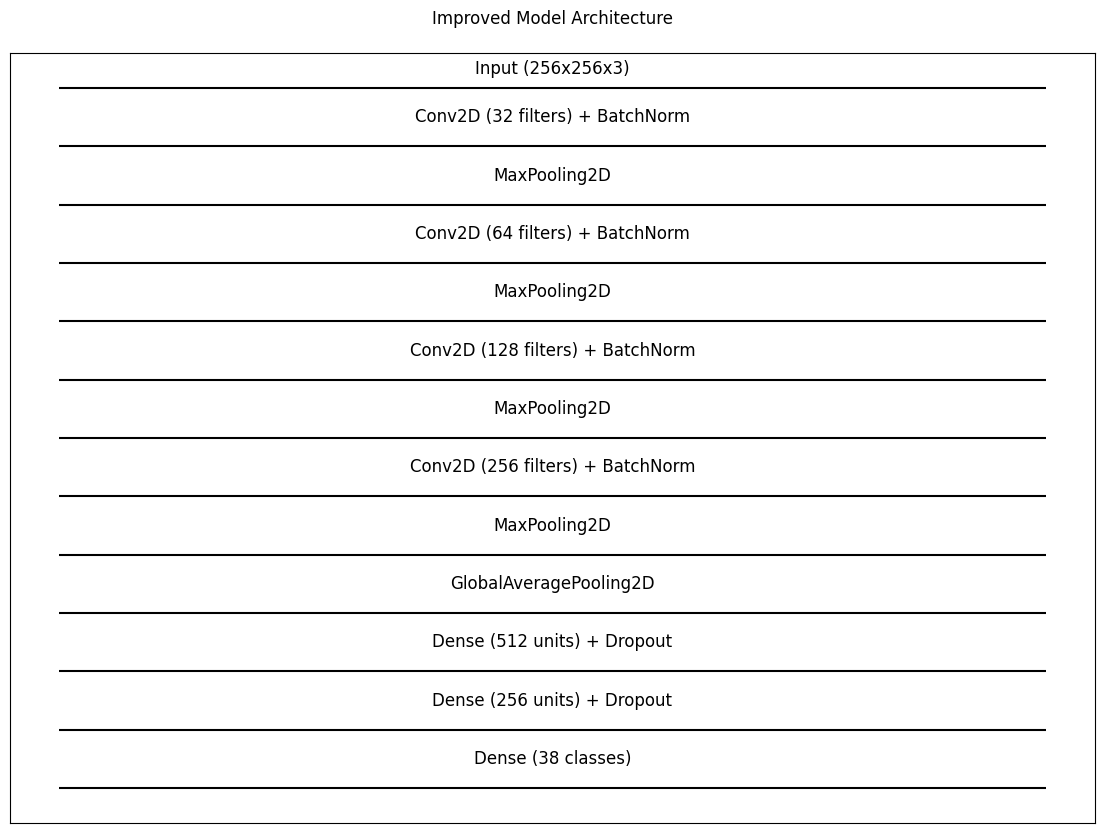

In [14]:


import matplotlib.pyplot as plt



def visualize_improved_model_architecture():

    layers = [

        "\nInput (256x256x3)",

        "Conv2D (32 filters) + BatchNorm",

        "MaxPooling2D",

        "Conv2D (64 filters) + BatchNorm",

        "MaxPooling2D",

        "Conv2D (128 filters) + BatchNorm",

        "MaxPooling2D",

        "Conv2D (256 filters) + BatchNorm",

        "MaxPooling2D",

        "GlobalAveragePooling2D",

        "Dense (512 units) + Dropout",

        "Dense (256 units) + Dropout",

        "Dense (38 classes)"

    ]

    

    plt.figure(figsize=(14, 10))

    for i, layer in enumerate(layers):

        plt.text(0.5, len(layers) - i - 0.5, layer, fontsize=12, ha="center", va="center")

        plt.hlines(y=len(layers) - i - 1, xmin=0.2, xmax=0.8, color="black")

    

    plt.xticks([])

    plt.yticks([])

    plt.title("Improved Model Architecture\n")

    plt.show()



visualize_improved_model_architecture()


In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
import torch.optim.lr_scheduler as lr_scheduler


# Define the schedule
initial_learning_rate = 1e-5
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=10000,  # Number of steps before decay
    decay_rate=0.96,    # Decay factor
    staircase=True      # Apply decay in discrete intervals
)
modelloaded = load_model('/kaggle/input/finalmodel101281e-5/final_model101281e-5.h5')

# Compile the model with the schedule
modelloaded.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
               metrics=[
                'accuracy',  # Default accuracy
                tf.keras.metrics.Precision(name='precision'),  # Precision metric
                tf.keras.metrics.Recall(name='recall'),        # Recall metric
                tf.keras.metrics.AUC(name='auc'),             # AUC metric
                # tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy')  # Top-5 Accuracy
            ])

In [16]:
history = modelloaded.fit(
    train_generator,  # This could be a flow from ImageDataGenerator or tf.data.Dataset
    validation_data=valid_generator,
    epochs=20,
    initial_epoch=10,
    batch_size=128
)

Epoch 11/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733960131.774840     104 service.cc:145] XLA service 0x783eb4004390 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733960131.774911     104 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   1/2197 ━━━━━━━━━━━━━━━━━━━━ 7:00:32 11s/step - accuracy: 0.5312 - auc: 0.9629 - loss: 1.6202 - precision: 0.7273 - recall: 0.2500

I0000 00:00:1733960138.246710     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 908s 408ms/step - accuracy: 0.5513 - auc: 0.9589 - loss: 1.5161 - precision: 0.7711 - recall: 0.3594 - val_accuracy: 0.6124 - val_auc: 0.9617 - val_loss: 1.3457 - val_precision: 0.7612 - val_recall: 0.4675
Epoch 12/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 889s 403ms/step - accuracy: 0.5635 - auc: 0.9610 - loss: 1.4752 - precision: 0.7803 - recall: 0.3739 - val_accuracy: 0.6076 - val_auc: 0.9590 - val_loss: 1.3730 - val_precision: 0.7449 - val_recall: 0.4772
Epoch 13/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 901s 409ms/step - accuracy: 0.5781 - auc: 0.9639 - loss: 1.4186 - precision: 0.7832 - recall: 0.3951 - val_accuracy: 0.6418 - val_auc: 0.9667 - val_loss: 1.2437 - val_precision: 0.7801 - val_recall: 0.5036
Epoch 14/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 891s 404ms/step - accuracy: 0.5851 - auc: 0.9649 - loss: 1.3934 - precision: 0.7832 - recall: 0.4041 - val_accuracy: 0.6365 - val_auc: 0.9652 - val_loss: 1.2533 - val_precision: 0.7576 - val_recall: 0.5125
Epoch 15/20
2197

In [17]:
# Save the final model after training
modelloaded.save('final_improved_model20,128,1e-5.h5')

# Optionally, save the history for later analysis
import pickle

with open('final_improved_model20,128,1e-5.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [18]:
# import time
# from datetime import datetime

# # Keep-alive script
# while True:
#     print(f"Keeping session alive... {datetime.now()}")
#     time.sleep(60 * 10)  # Every 10 minutes 

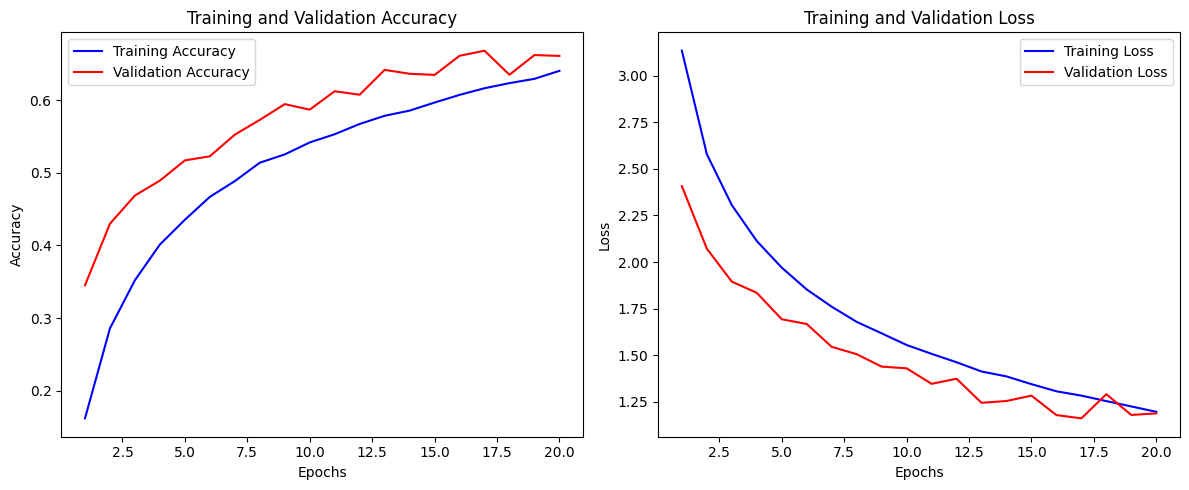

In [19]:
import pickle
import matplotlib.pyplot as plt

# Function to load a history object from a .pkl file
def load_history(file_path):
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
    return history

# Function to combine histories
def combine_histories(histories):
    combined_history = {
        'accuracy': [],
        'val_accuracy': [],
        'loss': [],
        'val_loss': []
    }
    for hist in histories:
        combined_history['accuracy'].extend(hist['accuracy'])
        combined_history['val_accuracy'].extend(hist['val_accuracy'])
        combined_history['loss'].extend(hist['loss'])
        combined_history['val_loss'].extend(hist['val_loss'])
    return combined_history

# Load histories from .pkl files
history1 = load_history('/kaggle/input/finalmodel10epochs128/final_model101281e-5.pkl')
# history2 = load_history('history2.pkl')

# Combine histories
combined_history = combine_histories([history1, history.history])

# Plot the combined history
def plot_training_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_training_history(combined_history)
